### **Social Media Sentiment Analysis of Shopee App Reviews**

This project analyzes anonymized Shopee app reviews (e-commerce platform) to gauge public sentiment and identify key themes. Shopee is a multinational e-commerce company launched in 2015 that has become the largest online marketplace in Southeast Asia. By mining user feedback, we aim to extract insights about customer satisfaction and areas for improvement in the e-commerce domain, contributing to consumer trust and social impact.

**Dataset**

https://www.kaggle.com/datasets/bwandowando/shopee-app-reviews-from-google-store/


**Findings and Implications**

From the analyses, we derive key insights. For instance:

* Predominantly Positive Reviews: Preliminary review snippets show many 5-star comments praising convenience (“amazing app, easy to use”). The sentiment-distribution chart likely skews positive, suggesting strong user satisfaction.

* Temporal Patterns: The sentiment trend may show spikes of negativity on certain dates (e.g., after a buggy update) or overall improvement as the app matures. Trends can correlate with app version changes or promotional events.

* Recurring Issues: If many low-rating reviews mention common terms (e.g., “address”, “install error”), our keyword analysis flags these as problem areas. For example, several reviewers complained about address or app crashes. Addressing such concerns (improving UX or customer support) would directly improve user trust.

* Social Impact Domain: In the e-commerce context, these findings inform **consumer rights and digital trust**. Positive sentiment indicates reliability, while identifying negative clusters helps Shopee improve fairness and transparency (e.g., resolving delivery or payment issues). Overall, sentiment insights can guide strategies to enhance user experience and **combat misinformation or dissatisfaction** in online shopping.

In summary, **data-driven visualizations reveal how users perceive Shopee's platform**. Positive trends reinforce what's working (e.g. user-friendly design), while negative signals pinpoint areas for action. These insights help businesses and policymakers ensure e-commerce platforms serve customers well.


**Challenges and Solutions**

During implementation, we encountered a few challenges:

* Data Quality: Some review texts contained emojis or non-standard characters (“üòÅ”). We handled these via regex cleaning. Missing values (e.g. empty app versions) were dropped or filled.

* Stopword and Noise Removal: Differentiating meaningful words from filler is crucial. We used NLTK stopwords to filter out common words. This was important for accurate keyword counts and sentiment scoring.

* Sentiment Model Choice: A simple model like TextBlob is easy to use but may misclassify nuanced comments. A BERT-based model is more accurate but heavy. We experimented with both: TextBlob for quick polarity scores and a pretrained transformer for fine-grained classification.

* Modular Code Structure: Ensuring code modularity added complexity. We separated loading/cleaning, analysis, and plotting into distinct modules (data_loader.py, sentiment_analyzer.py, visualizer.py, main.py) to maintain clarity and reusability.

* Performance: With thousands of reviews, plotting and NLP can be slow. We optimized by vectorized Pandas operations (e.g., grouping by date) and limiting text length for the transformer model (e.g., to 512 tokens).

By addressing these, we produced robust, maintainable code that handles exceptions gracefully and produces clear outputs.

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Python for Data Science/Project3
[NbConvertApp] Converting notebook data_loader.ipynb to python
[NbConvertApp] Writing 913 bytes to data_loader.py
[NbConvertApp] Converting notebook sentiment_analyzer.ipynb to python
[NbConvertApp] Writing 750 bytes to sentiment_analyzer.py
[NbConvertApp] Converting notebook visualizer.ipynb to python
[NbConvertApp] Writing 2707 bytes to visualizer.py


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/content/drive/MyDrive/Colab Notebooks/Python for Data Science/Project3/visualizer.py:24: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  qtr_series = df.groupby(df['date'].dt.to_period('Q'))['sentiment_score'].mean()


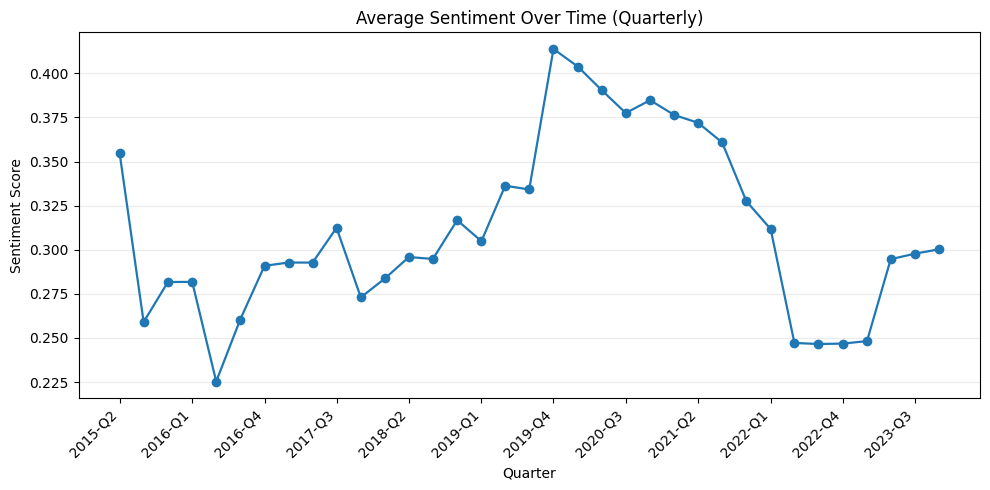

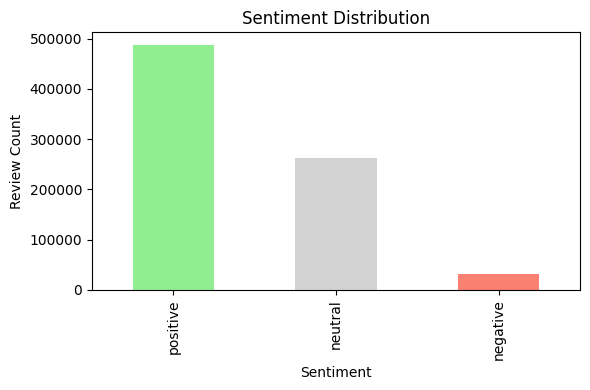

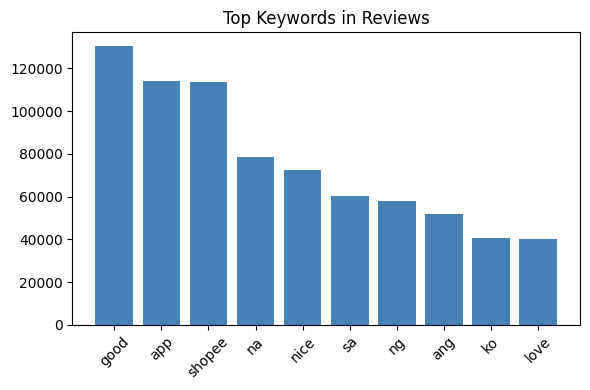

In [1]:
# main.py
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/Python for Data Science/Project3"

# convert file .ipynb to .py
!jupyter nbconvert --to python data_loader.ipynb
!jupyter nbconvert --to python sentiment_analyzer.ipynb
!jupyter nbconvert --to python visualizer.ipynb
import nltk
nltk.download('stopwords')

from data_loader import load_data, clean_text
from sentiment_analyzer import get_sentiment_textblob
from visualizer import plot_sentiment_over_time, plot_sentiment_distribution, plot_top_keywords
from textblob import TextBlob

def main():
    df = load_data("shopee_reviews.csv")
    if df is None:
        return
    # Clean text data
    df['clean_text'] = df['review_text'].apply(clean_text)
    # Compute sentiment
    df['sentiment_label'] = df['clean_text'].apply(get_sentiment_textblob)
    df['sentiment_score'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    # Save processed data (optional)
    df.to_csv("processed_reviews.csv", index=False)
    # Generate visualizations
    plot_sentiment_over_time(df)
    plot_sentiment_distribution(df)
    plot_top_keywords(df)

if __name__ == "__main__":
    main()
